C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


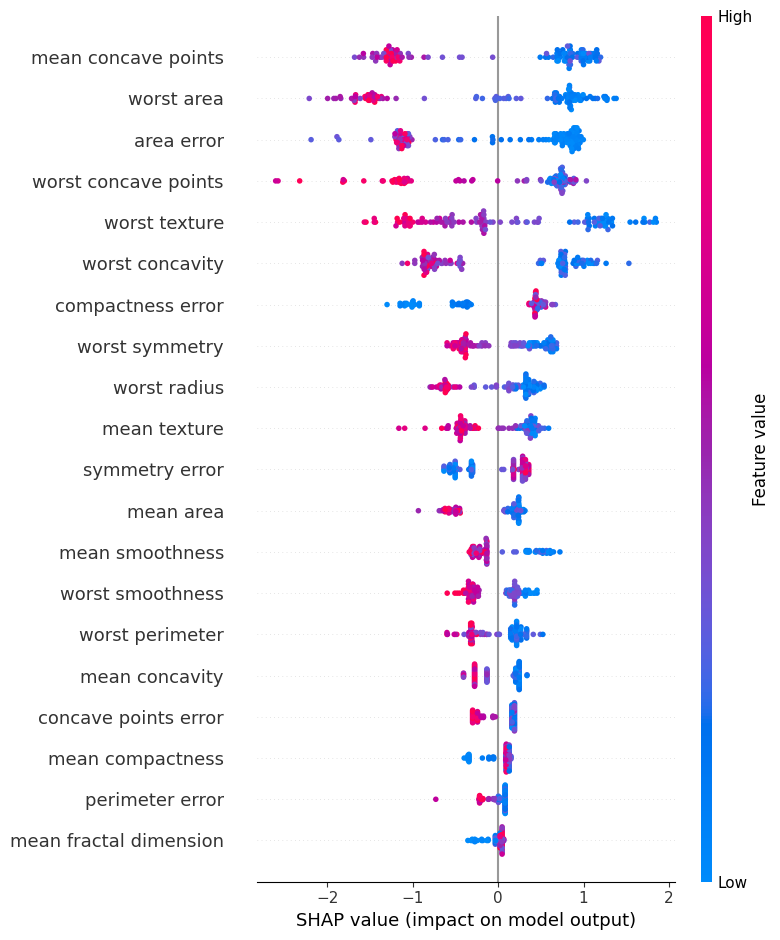

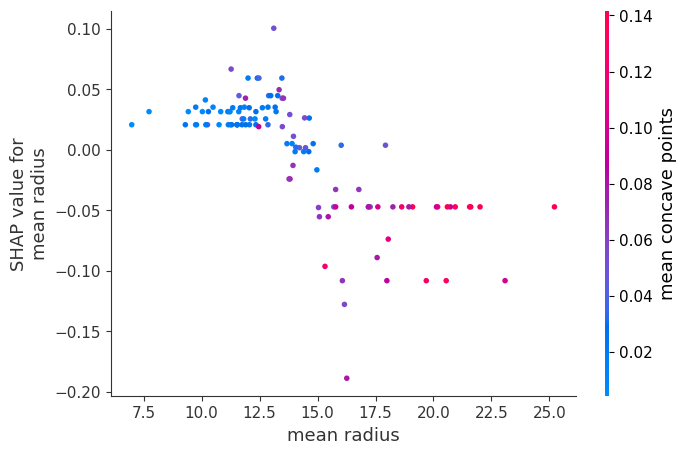

In [1]:
import shap
import xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [19:58:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


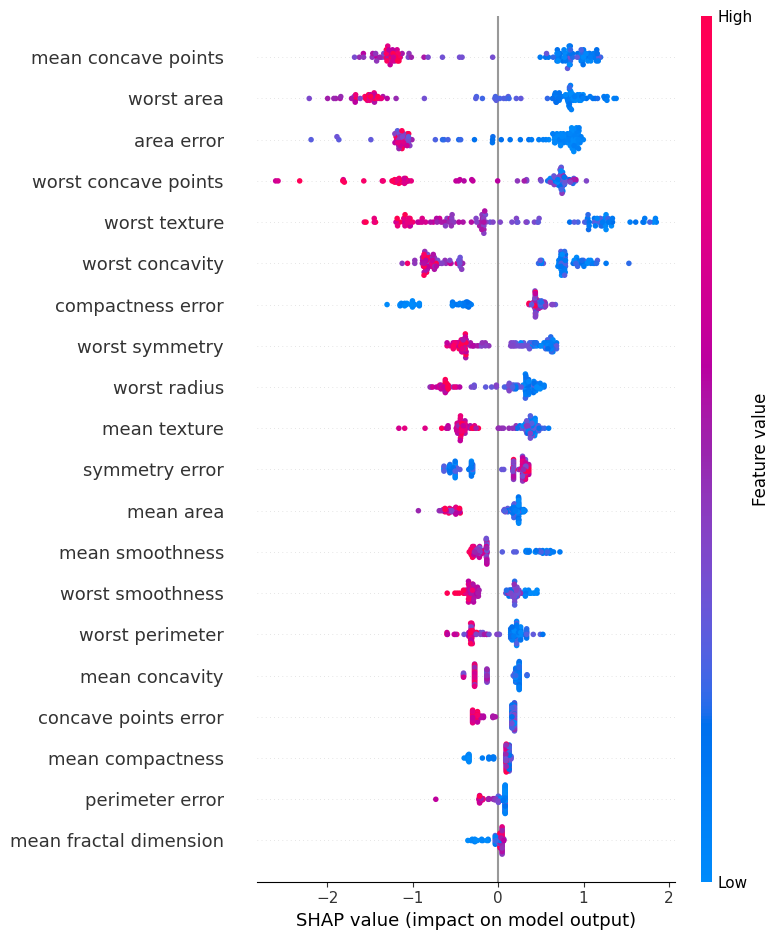

In [3]:
# Train an XGBoost model
model = xgboost.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)

# SHAP Dependence plot for a specific feature
#shap.dependence_plot("mean radius", shap_values.values, X_test)

# SHAP Force plot for a single instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0])


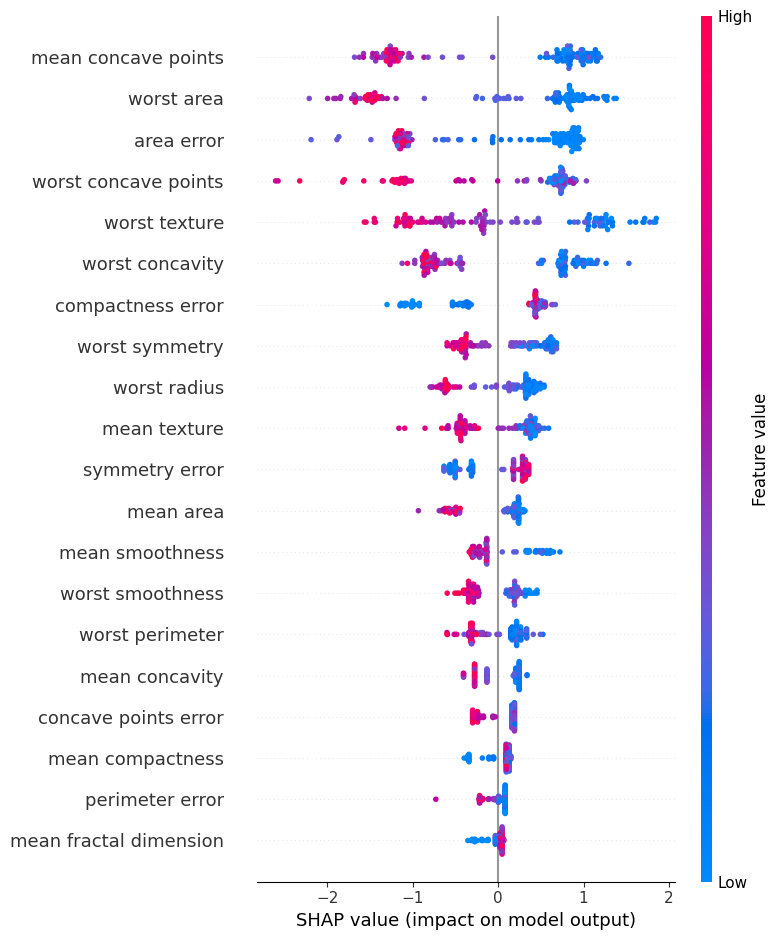

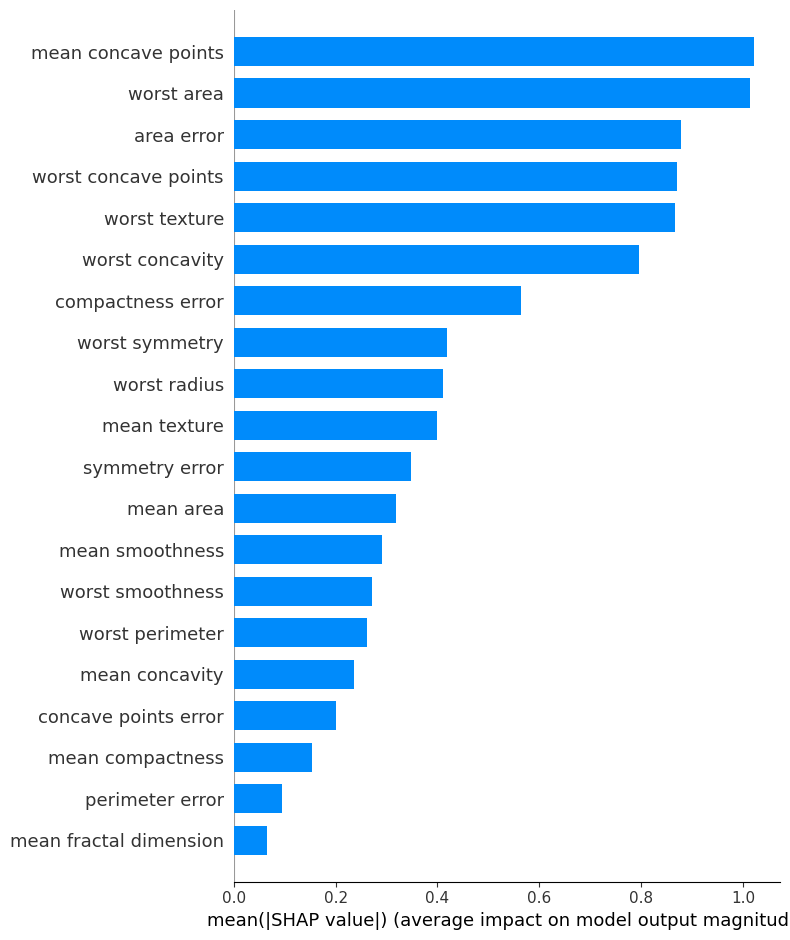

In [4]:
# Feature Importance Plot
shap.summary_plot(shap_values, X_test)

# Optional: Bar Plot for Feature Importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [20:01:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


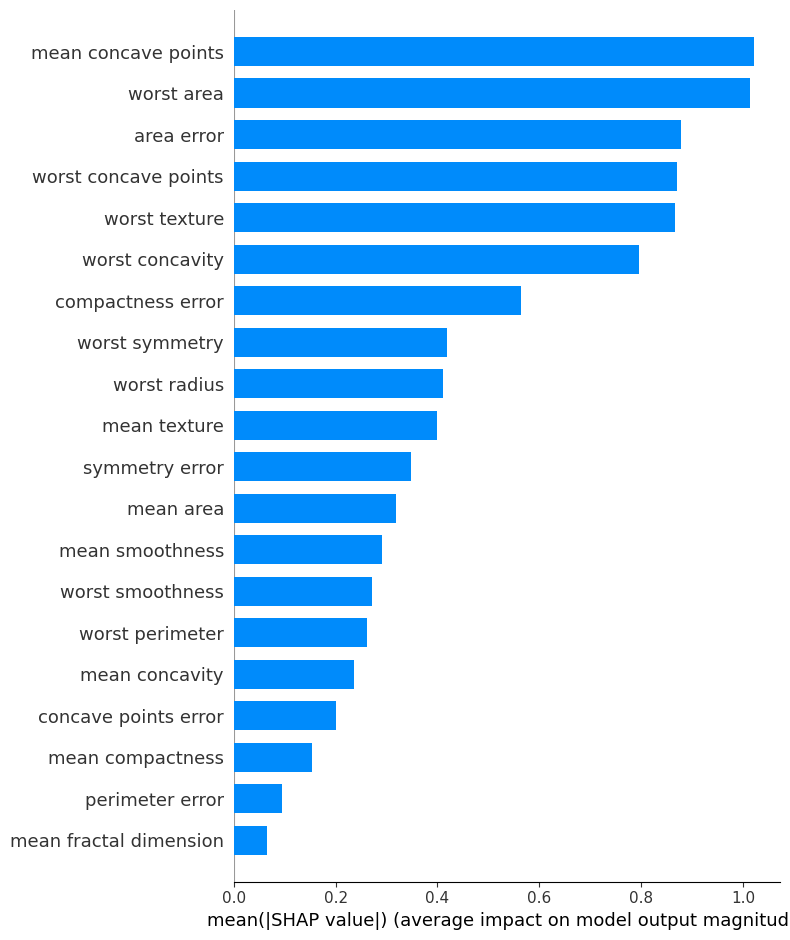

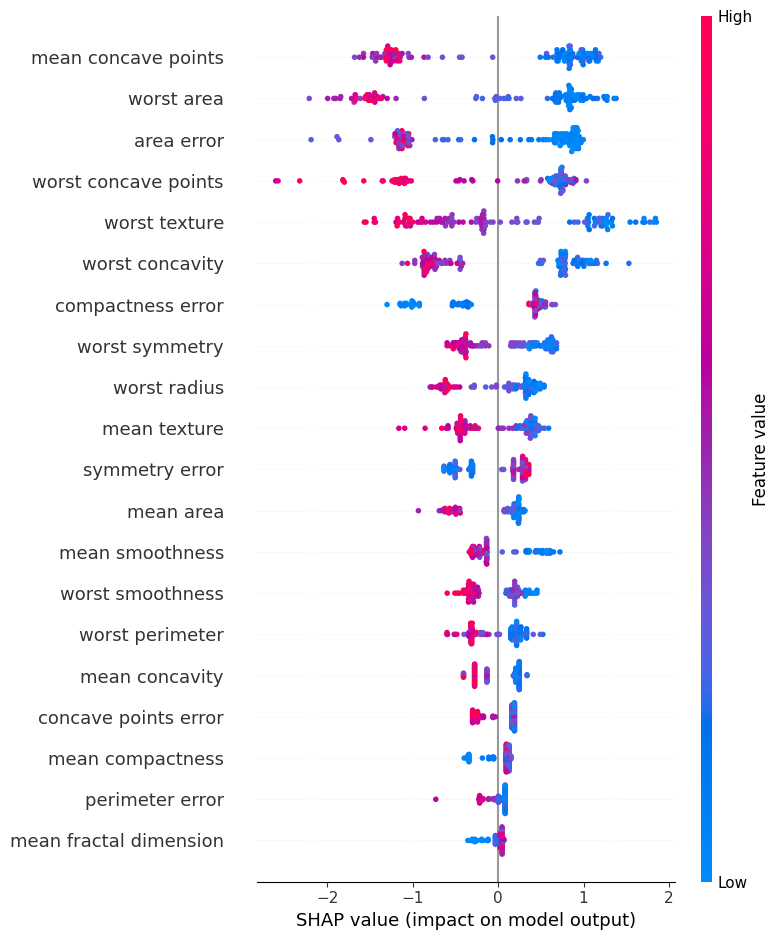

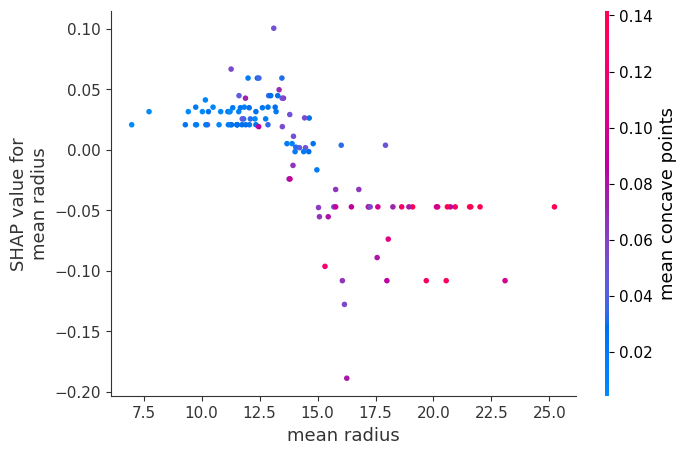

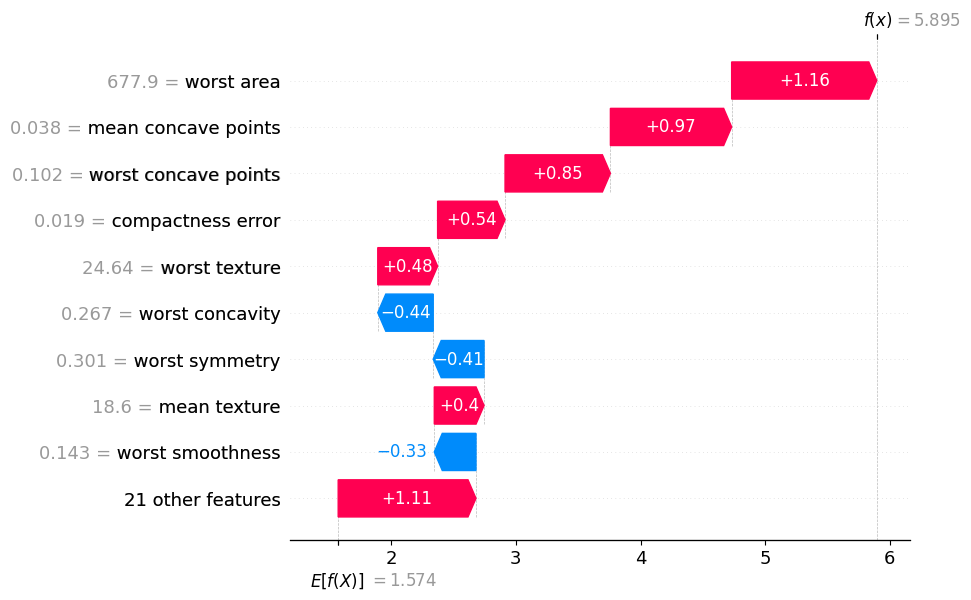

In [5]:
import shap
import xgboost
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgboost.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 1️⃣ Feature Importance (Bar Plot)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 2️⃣ Beeswarm Plot (Overall SHAP Values)
shap.summary_plot(shap_values, X_test)

# 3️⃣ Dependence Plot (Feature Interaction)
shap.dependence_plot("mean radius", shap_values.values, X_test)

# 4️⃣ Force Plot (Local Explanation for a Single Prediction)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0])

# 5️⃣ Waterfall Plot (Step-by-step Feature Contribution)
shap.waterfall_plot(shap_values[0])
